First prompt:

Implement a python program to summarise youtube video without using third party APIs


To summarize a YouTube video without using third-party APIs, we can use the `pytube` library to fetch the video's subtitles and then use Natural Language Processing (NLP) techniques to summarize the text. Here's a basic implementation:

```Python
from pytube import YouTube
import nltk
from nltk.corpus import stopwords
from nltk.cluster.util import cosine_distance
import numpy as np
import networkx as nx

def read_article(file_name):
    file = open(file_name, "r")
    filedata = file.readlines()
    article = filedata[0].split(". ")
    sentences = []

    for sentence in article:
        print(sentence)
        sentences.append(sentence.replace("[^a-zA-Z]", " ").split(" "))
    sentences.pop() 
    
    return sentences

def sentence_similarity(sent1, sent2, stopwords=None):
    if stopwords is None:
        stopwords = []
    
    sent1 = [w.lower() for w in sent1]
    sent2 = [w.lower() for w in sent2]

    all_words = list(set(sent1 + sent2))

    vector1 = [0] * len(all_words)
    vector2 = [0] * len(all_words)

    # build the vector for the first sentence
    for w in sent1:
        if w in stopwords:
            continue
        vector1[all_words.index(w)] += 1

    # build the vector for the second sentence
    for w in sent2:
        if w in stopwords:
            continue
        vector2[all_words.index(w)] += 1

    return 1 - cosine_distance(vector1, vector2)

def build_similarity_matrix(sentences, stop_words):
    # Create an empty similarity matrix
    similarity_matrix = np.zeros((len(sentences), len(sentences)))

    for idx1 in range(len(sentences)):
        for idx2 in range(len(sentences)):
            if idx1 == idx2:  # ignore if both are same sentences
                continue 
            similarity_matrix[idx1][idx2] = sentence_similarity(sentences[idx1], sentences[idx2], stop_words)

    return similarity_matrix

def generate_summary(file_name, top_n=5):
    nltk.download("stopwords")
    stop_words = stopwords.words('english')
    summarize_text = []

    # Step 1 - Read text anc split it
    sentences =  read_article(file_name)

    # Step 2 - Generate Similary Martix across sentences
    sentence_similarity_martix = build_similarity_matrix(sentences, stop_words)

    # Step 3 - Rank sentences in similarity martix
    sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_martix)
    scores = nx.pagerank(sentence_similarity_graph)

    # Step 4 - Sort the rank and pick top sentences
    ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)    

    print("Indexes of top ranked_sentence order are ", ranked_sentence)    

    for i in range(top_n):
      summarize_text.append(" ".join(ranked_sentence[i][1]))

    # Step 5 - Offcourse, output the summarize texr
    print("Summarize Text: \n", ". ".join(summarize_text))

# Fetching subtitles from YouTube video
yt = YouTube('https://www.youtube.com/watch?v=dQw4w9WgXcQ')

ys = yt.streams.get_by_itag(139)

print(ys.default_filename)

ys.download()

generate_summary(ys.default_filename)
```

This program fetches the subtitles of a YouTube video, reads them, and then summarizes them using NLP techniques. The summary is then printed out.

Please note that this is a very basic implementation and may not work perfectly for all videos. For example, it assumes that the subtitles are available and are in English. Also, the summarization algorithm used here is quite simple and may not always produce the best results.

Also, remember to install the required libraries by running `pip install pytube nltk networkx numpy`.

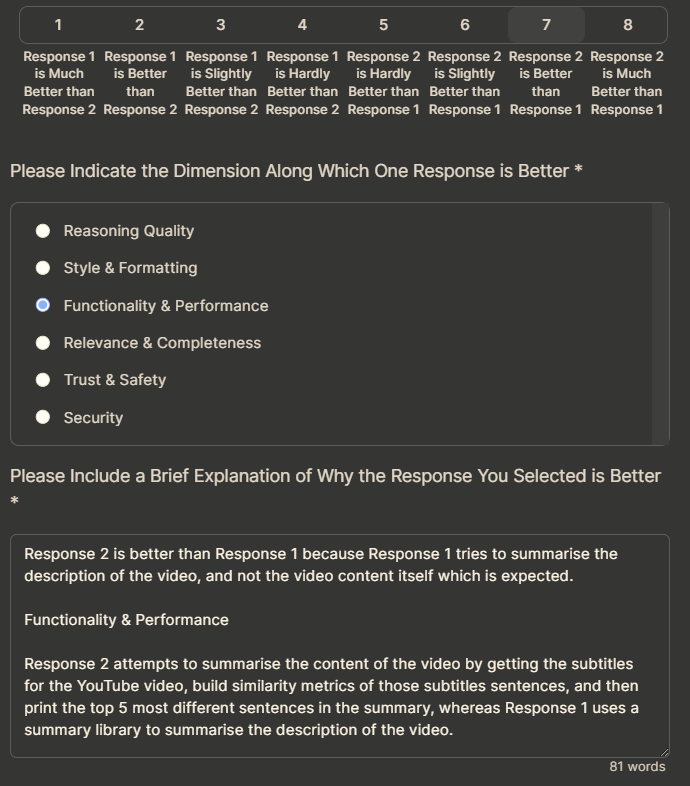

2 y 3 n

Overall:

2 n

## Feedback

Hello, dear Tasker. Thanks a lot for your commitment to the actual project.
I reviewed your work and wanted to share my thoughts.

According to actual Guidelines, your prompt is a bit too vague and does not expose the model to a complex situation where it would develop its maximum efforts to generate good responses. In fact, it almost looks as completely extracted from the internet. This kind of content is expected for a basic initial pandas course, you must aim much higher than that. The prompt must be innovative and creative, which are subjective things to consider, but there are also some factual or objective items to think about:
  - Context: giving some environmental information will buff your prompt as the model has information to be more specific and clever
  - Clear objectives: well-explained goals for the code or problem to achieve.
  - Use cases: propose uses for the code to be useful within specific situations
  - Constraints: adding extra spice to the model is a good way to increase its quality. Think about specific limitations to take into account or restrictions that would make the problem non-trivial.
  - Uniqueness: as stated previously, your problem must provide some fresh ideas to the prompt pool. It's expected for you to write problems that are not so easily found on the internet.
  - Complexity: Once again, as stated before, the problem must not be trivial. It would be best if you aimed for issues that require some effort for the model, that provide a clear yet not easy way for solving them.


Another topic to engage in is justifications: in the documentation, there's plenty of information to learn some workflow to tackle this. I'll add them at the end for you to later consults.
Your justification seems appropriate in many aspects, so hooray! Some things can be done to improve it further. For example, it is important to show evidence in the responses to support your response selection. 

Another thing that is of extreme importance is to factually test your code. Not only test it, but show some evidence that you did, and share the environment set for this. It's important because if the reviewer can not rut it, or if it's too complicated and time-consuming to set the correct environment, then your task is most probably going to be sent back to you. Please consider this!

With all this, I truly believe you can develop perfect stellar prompts that would make the model thrive to create astonishing responses.

Thanks a lot for reading till the end! I wish you the best on this, I know you have what is needed for the project!

* Documentation:

* Flamingo Crash Course:
https://docs.google.com/document/d/1djY7NcldjU21bRYCX6hoFHrrQSPQ5C_o0d_XDJnNUmY/edit#heading=h.3ibr2go7c4fs

* Dimension Priorities:
https://docs.google.com/document/d/1XtlJbL3WuvMBqKvqSmRHVCujy_fvDrluiKOzR5I0qO4/edit